In [1]:
!pip install mplfinance

In [2]:
pip install --upgrade pandas

In [4]:
pip install --upgrade pandas-datareader

In [3]:
!pip install --upgrade mplfinance 

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import plotly
import mplfinance as mpf
import datetime
%matplotlib inline


In [6]:
import warnings

import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
# pyo.init_notebook_mode()

In [ ]:
# cf.go_offline()
# init_notebook_mode()

In [7]:
#Load Data
company = 'AAPL'
start = dt.datetime(2012,1,12)
end = dt.datetime(2020,1,1)

df = web.DataReader(company, 'yahoo', start, end)
data = df.filter(['Close'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2005 entries, 2012-01-12 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2005 non-null   float64
 1   Low        2005 non-null   float64
 2   Open       2005 non-null   float64
 3   Close      2005 non-null   float64
 4   Volume     2005 non-null   float64
 5   Adj Close  2005 non-null   float64
dtypes: float64(6)
memory usage: 109.6 KB


In [9]:
df['Close'].tail()

Date
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
2019-12-31    73.412498
Name: Close, dtype: float64

In [10]:
data.tail()

,Close
Date,
2019-12-24,71.067497
2019-12-26,72.477501
2019-12-27,72.449997
2019-12-30,72.879997
2019-12-31,73.412498


# **Stock Price Visualization**

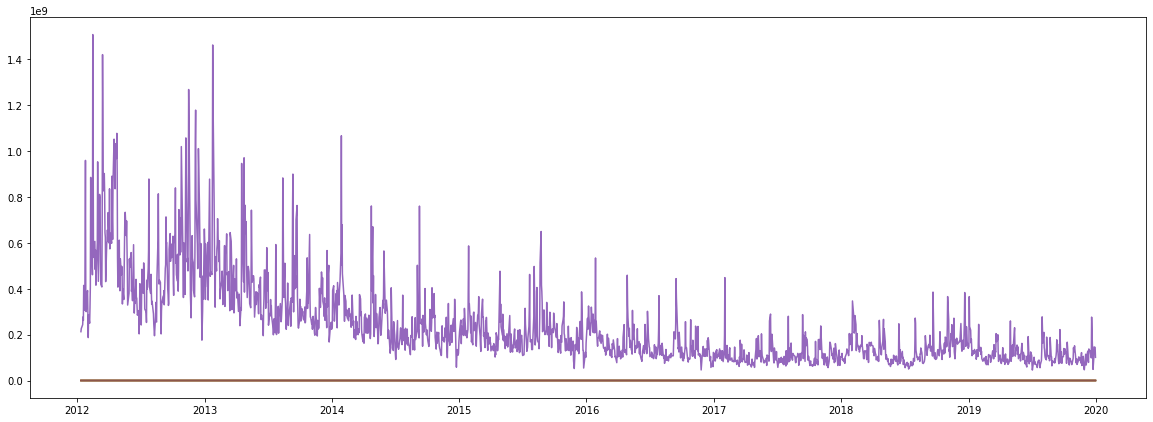

In [8]:
plt.figure(figsize=(20,7))
plt.plot(df)

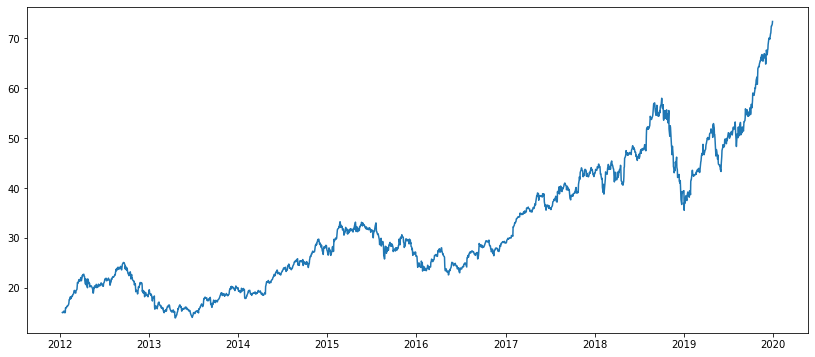

In [9]:
plt.figure(figsize=(14,6))
plt.plot(data)

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




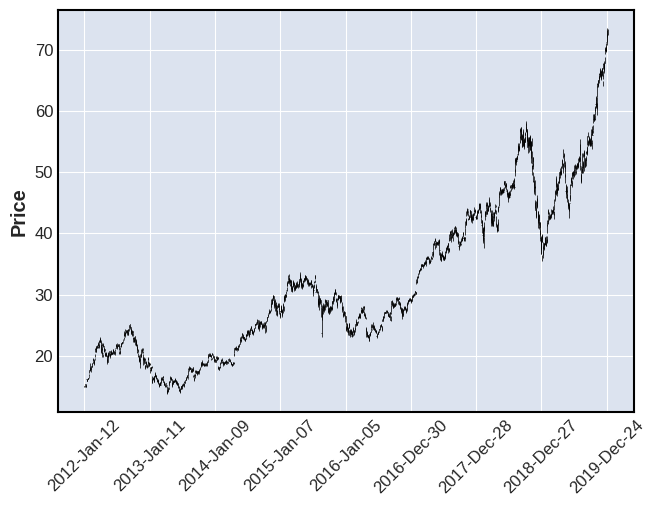

In [10]:
mpf.plot(df)

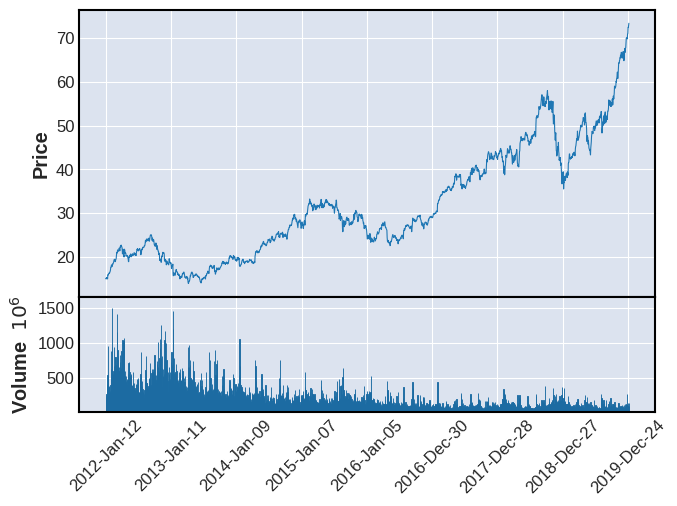

In [11]:
mpf.plot(df, type = 'line', volume = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



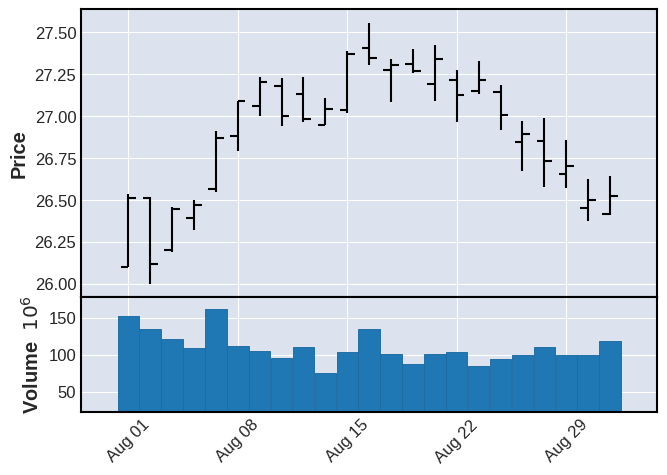

In [12]:
mpf.plot(df['2016-08'], volume = True)

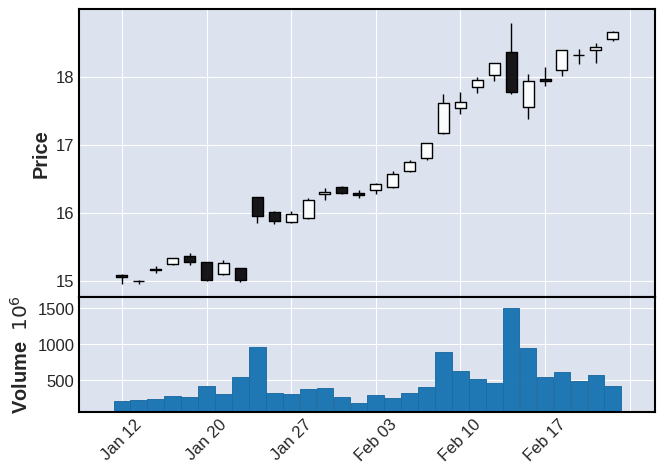

In [13]:
mpf.plot(df[:30], type = "candle", volume = True)

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




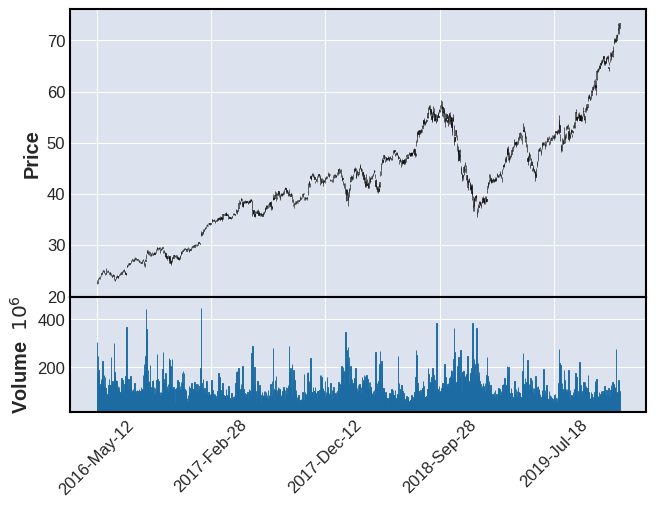

In [14]:
mpf.plot(df['2016-05-12':], type = "candle", volume = True)

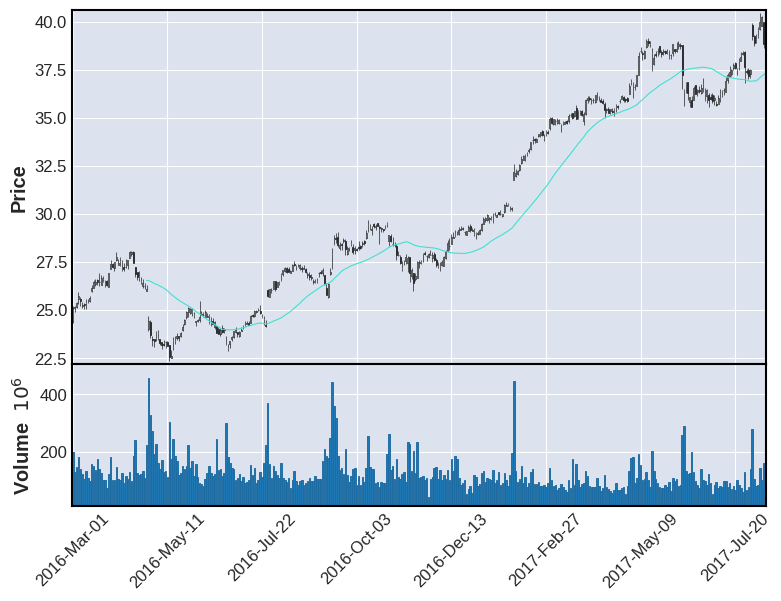

In [15]:
#moving avg
#plt.figsize(16,12)
mpf.plot(df['2016-03-01':'2017-08-13'], type = 'candle', mav = (40), volume = True, tight_layout = True)

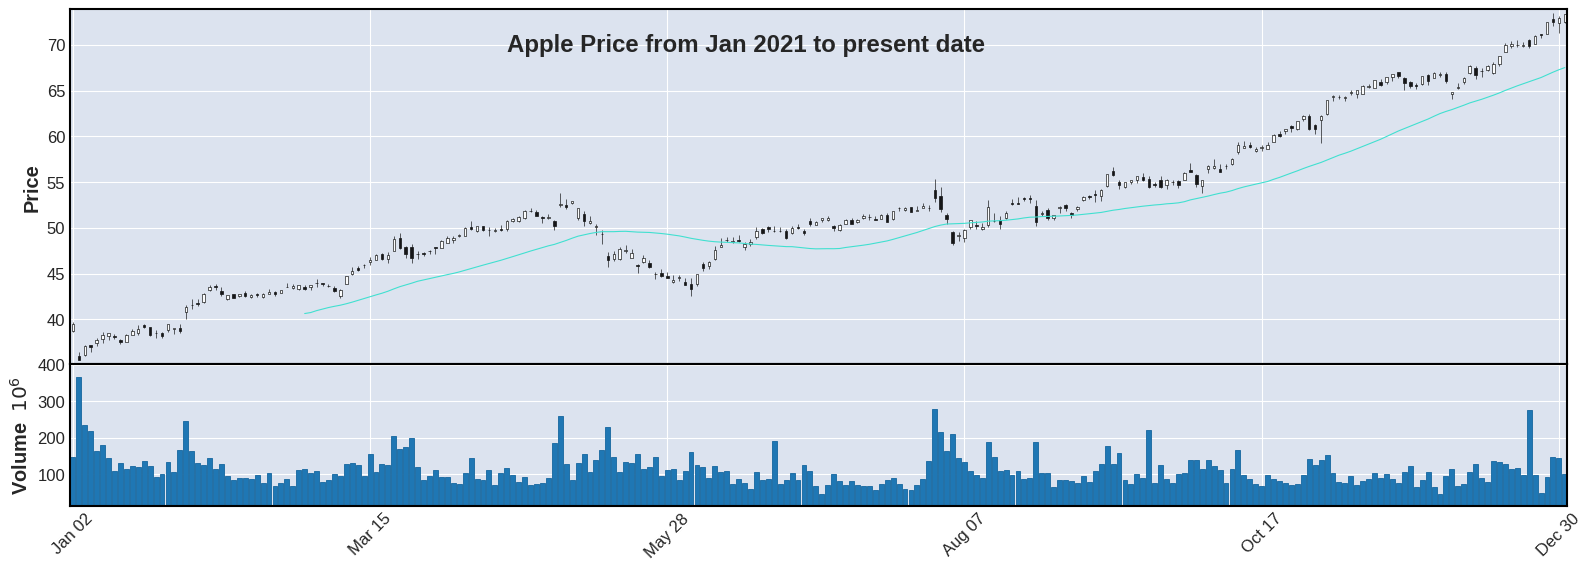

In [16]:
mpf.plot(df['2019-01-01':], figratio = (30,10),
         type = 'candle',
         title = 'Apple Price from Jan 2021 to present date',
         mav = (40),
         volume = True, 
         tight_layout = True
         )

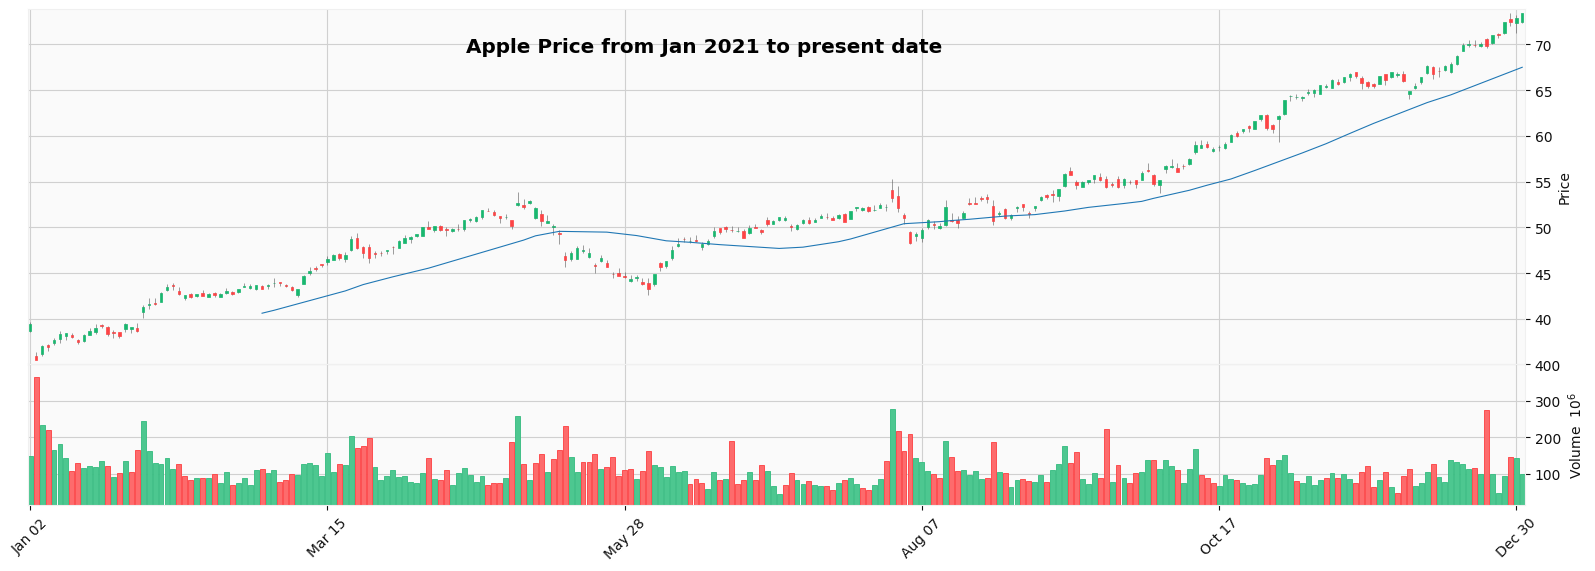

In [17]:
mpf.plot(df['2019-01-01':], figratio = (30,10),
         type = 'candle',
         title = 'Apple Price from Jan 2021 to present date',
         mav = (40),
         volume = True, 
         tight_layout = True,
         style = 'yahoo'
         )

# **Preparing Data for the model**

In [11]:
data

,Close
Date,
2012-01-12,15.049643
2012-01-13,14.993214
2012-01-17,15.167857
2012-01-18,15.325357
2012-01-19,15.276786
...,...
2019-12-24,71.067497
2019-12-26,72.477501
2019-12-27,72.449997


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.0185343 ],
       [0.01758536],
       [0.02052227],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [13]:
scaled_data.shape

(2005, 1)

In [14]:
#look back days to predict
prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days: x, 0])
  y_train.append(scaled_data[x,0])

In [15]:
#training sets into numpy arr
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1945, 60)

In [44]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1945, 60, 1)

In [46]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(32))

model.add(Dense(1))


In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
195/195 [==============================] - 19s 71ms/step - loss: 0.0060
Epoch 2/10
195/195 [==============================] - 14s 72ms/step - loss: 0.0017
Epoch 3/10
195/195 [==============================] - 14s 72ms/step - loss: 0.0016
Epoch 4/10
195/195 [==============================] - 14s 71ms/step - loss: 0.0011
Epoch 5/10
195/195 [==============================] - 14s 71ms/step - loss: 0.0010
Epoch 6/10
195/195 [==============================] - 14s 72ms/step - loss: 9.9446e-04
Epoch 7/10
195/195 [==============================] - 14s 72ms/step - loss: 9.4680e-04
Epoch 8/10
195/195 [==============================] - 14s 72ms/step - loss: 8.6297e-04
Epoch 9/10
195/195 [==============================] - 14s 72ms/step - loss: 9.1609e-04
Epoch 10/10
195/195 [==============================] - 14s 72ms/step - loss: 8.7232e-04


## Testing 

In [49]:
# testing
test_start = dt.datetime(2020,1,2)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

In [59]:
print(test_end)

2021-08-15 14:30:03.512955


In [50]:
actual_prices = test_data['Close'].values
actual_prices[:10]

array([75.08750153, 74.35749817, 74.94999695, 74.59750366, 75.79750061,
       77.40750122, 77.58249664, 79.23999786, 78.16999817, 77.83499908])

In [51]:
# training + testing data
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
total_dataset

Date
2012-01-12     15.049643
2012-01-13     14.993214
2012-01-17     15.167857
2012-01-18     15.325357
2012-01-19     15.276786
                 ...    
2021-08-09    146.089996
2021-08-10    145.600006
2021-08-11    145.860001
2021-08-12    148.889999
2021-08-13    149.100006
Name: Close, Length: 2413, dtype: float64

In [52]:
model_inputs = total_dataset[len(total_dataset)- len(test_data)- prediction_days :].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

##Predictions

In [53]:
model_inputs = total_dataset[len(total_dataset)- len(test_data)- prediction_days :].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [54]:
#make predictions on test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [55]:
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)

## Visualize the actual price with the model


Text(0, 0.5, 'Share Price')

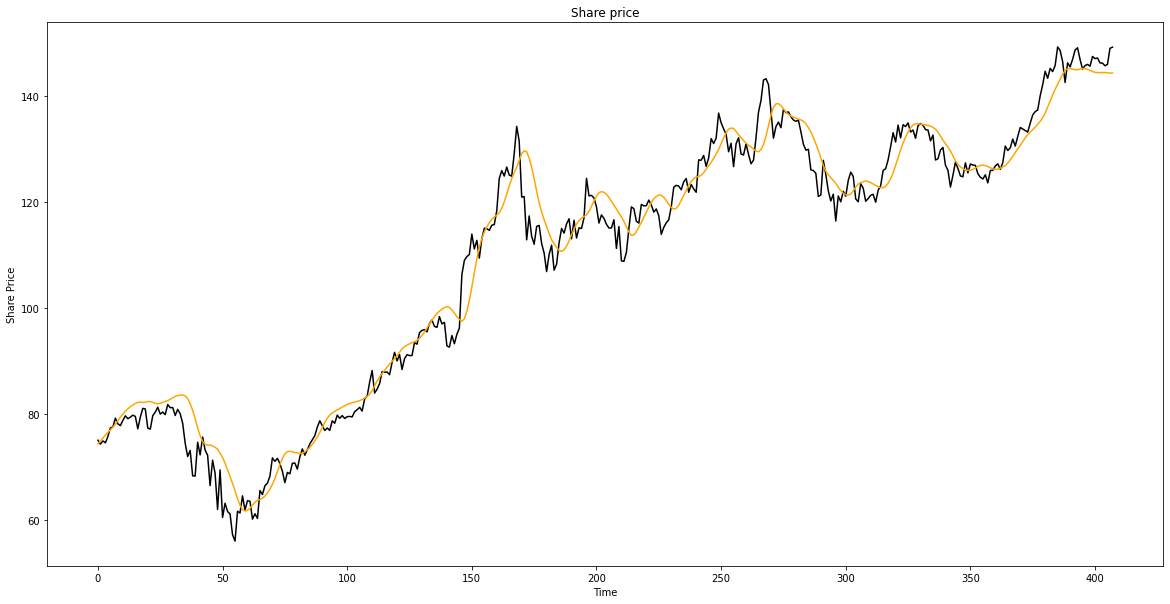

In [60]:
plt.figure(figsize=(20,10))

plt.plot(actual_prices,c='black')
plt.plot(pred_price,c='orange')
plt.title('Share price')
plt.xlabel('Time')
plt.ylabel('Share Price')


## Predict the closing stock price for the next day

In [57]:
#predict next date
real_data = [model_inputs[len(model_inputs)+1 - prediction_days: len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))


In [58]:
pred = model.predict(real_data)
pred = scaler.inverse_transform(pred)
print(pred)

[[144.50449]]
